In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Estadística y análisis de datos.

## Introducción

El objetivo de este primer capítulo es introducir al estudiante a la estadística. Esto implica comenzar a desarrollar varios conceptos usados en estadística, comenzar a aprender el vocabulario estadístico,  discutir los problemas que intenta resolver la estadística. Como es de esperar, tal tarea no es simple y seguramente tome más de un capítulo (o de un curso, o de un libro). Por ello mucho de los conceptos introducidos en este capítulo serán repetidos y extendidos a lo largo del resto del curso.

## Estadística

La [estadística](https://es.wikipedia.org/wiki/Estad%C3%ADstica) es el estudio de la recolección, anális, interpretación y organización de datos. El corolario de esta definición podría ser que; además de ser una disciplina en si misma, la estadística es una disciplina auxiliar de todas las demás ciencias.

En los últimos años ha comenzado a desarrollarse una disciplina llamada ciencia de datos (_data science_ en inglés), para muchos no es más que una forma nueva y [sexy](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century/) de llamar a la vieja estadística.

Una posible diferencia entre la ciencia de datos y la estadística se muestra en el siguiente diagrama de Venn. 
<a href="http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram">
<img src='imagenes/DS.png' width=300 >
</a>

Seún el diagrama, la gran diferencia entre la investigación tradicional y la ciencia de datos radica no en los conocimientos estadísticos (que ambas requieren) si no en las habilidades de _hacking_. En esto contexto _hacking_ no hace referencia a la capacidad de vulnerar la seguridad de computadoras ajenas, si no a _la creatividad y el ingenio en el uso de habilidades técnicas para construir cosas y encontrar soluciones inteligentes a los problemas_. Es requisito de este curso tener algunas nociones básicas de programación. El lenguaje que usaremos en este curso es Python. Si no sabés programar o no sabes Python o simplemente estás un poco oxidada entonces es buena idea dejar de leer esto por un momento y pasar a leer las siguientes [notebooks](https://github.com/aloctavodia/EBAD/tree/master/00_intro_python). Uno de los objetivos del curso es expandir esos conocimientos de programación para el análisis de datos. Otro de los objetivos del curso es evitar que caigan en la zona peligrosa! para lo cual deberán aprender a usar (y crear) modelos estadísticos, interpretarlos y comprender cuales son los límites de las aproximaciones usadas.

Como puede verse en el diagrama, tanto la investigación tradicional como la ciencia de datos necesitan ir acompañadas de _conocimiento específico de dominio_. La estadística puede ser de ayuda para estudiar genomas y partículas elementales, pero para poder hacer preguntas relevantes (y entender las respuestas) primero hay que comprender que son los genomas y que las partículas elementales. La estadística NO es una máquina auto-mágica por donde entran datos en crudo por un lado y sale información por el otro. La estadística si es una herramienta que nos ayuda a pensar y tomar decisiones de forma adecuada, pero requiere del conocimiento, el criterio y la responsabilidad de quien la usa.

## Estadística Descriptiva

La estadística descriptiva se ocupa de describir de forma cuantitativa un conjunto de datos. Para ello se hace suele ser conveniente utilizar lo que se conoce como estadísticas sumarias que son un conjunto de medidas de centralidad, de dispersión y de forma. Para algunos autores las medidas de forma se clasifican junto con las de dispersión.

### Centralidad

#### Media

También llamada media aritmética o valor esperado,  es igual a la suma de todos los valores de una variable pesados por la probabilidad de cada uno de esos valores.

$$\mu = E[X] = \int_{-\infty}^{\infty} xh(x) d(x) = \frac{1}{n} \sum_{i=1}^n{x_i}
 = \sum x P(x) = $$

A veces el término promedio se usa como sinónimo de media, pero hay autores que prefieren llamar promedio a cualquier medida que sirva para calcular la centralidad de una distribución.

La media es una buena descripción si los objetos que estamos midiendo son más o menos similares, pero puede ofrecer una visión muy distorcionada si la diferencia entre objetos medidos es grande, como suele suceder con los salarios de un país.
       
#### Mediana  

La mediana es el número que separa un conjunto de datos en una mitad superior y otra inferior.

$$\int_{-\infty}^{m} xh(x) d(x) \geq  \frac{1}{2}  y \int_{m}^{\infty} xh(x) d(x) \geq \frac{1}{2}$$
        
#### Moda

El valor más frecuente de una distribución.

In [88]:
# x ~ N(0, 2)
x = np.random.normal(size=1000)
print 'media %.3f' % np.mean(x)
print 'mediana %.3f' % np.median(x)
# La moda no tiene sentido para un conjunto 
# de floats, salvo que estos sean discretizados
#print 'moda %.3f' % stats.mode(x)[0]

media 0.006
mediana -0.007


### Dispersión  

#### Varianza
Mide la dispersión de un conjunto de valores. Es cero para un conjunto de valores identicos.

$$V(X) =  E[(X - \mu)^2] = \int_{-\infty}^{\infty} (x-\mu)^2 h(x) d(x) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$
       
#### Desviación standard 

Es simplemente la raiz cuadrada de la varianza
$$\sigma = \sqrt{V}$$


In [91]:
print 'varianza %.3f' % np.var(x)
print u'desviación standard %.3f' % np.std(x)

varianza 1.018
desviación standard 1.009


### Forma

#### Skewness (asimetría)  

$$S = \int_{-\infty}^{\infty} (\frac{x-\mu}{\sigma})^3 h(x) d(x) $$

#### Kurtosis (curtosis)  

$$K = \int_{-\infty}^{\infty} (\frac{x-\mu}{\sigma})^4 h(x) d(x) - 3$$  

In [85]:
print u'asimetría %.3f' % stats.skew(x)
print 'curtosis %.3f' % stats.kurtosis(x)

asimetría 2.096
curtosis 6.813


### Cuantil

El aésimo cuantil para una función de distribución F es el punto $x_a$, para el cual se cumple que:
    
       $$F(x_a) = a$$  

Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:
    
* Los Cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0.25, 0.50 y 0.75);
* Los Quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0.20, 0.40, 0.60 y 0.80);
* Los Deciles, que dividen a la distribución en diez partes.
* Los Percentiles, que dividen a la distribución en cien partes.
* La mediana es el percentil 50.
    
En Python el cálculo de estos estadísticos puede realizarse facilmente usando funciones predefinidas en NumPy y SciPy.

In [95]:
print 'percentiles (25, 50, 75) %.3f, %.3f, %.3f' % tuple(np.percentile(x , [25, 50, 75]))

percentiles (25, 50, 75) -0.649, -0.007, 0.660


Todas las medidas antes mencionadas son útiles por que resumen en pocos números una gran cantidad de datos. Sin embargo, al sintetizar la información, también pueden ocultarla. Es por ello que siempre es buena idea visualizar la distribución de los datos. Cuatro representaciones comunes son los histogramas, _kernel plots_, _box plots_ y _violin plots_.

### Histogramas

En un histograma se representa la frecuencia con la que aparecen los distintos valores en un conjunto de datos. Se utilizan _barras_ contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en _bins_, y suelen graficarse sin normalizar o normalizados. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos y no distribuciones.

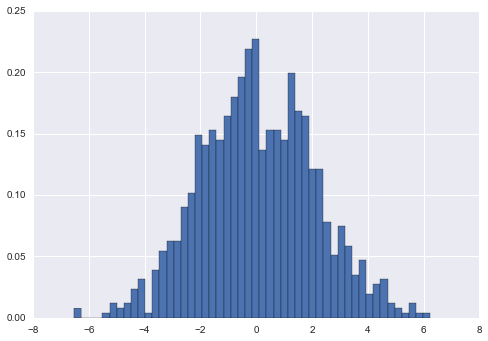

In [46]:
plt.hist(x, bins=50, normed=True, cumulative=False); 

### Kernel Density plot

Es una forma _suavizada_ de un histograma. Un gráfico _KDE_ se dibuja de la siguiente forma: se reemplaza cada dato por una distribución Gaussiana y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana es posible usar otras distribuciones. En este contexto el nombre genérico para esas distribuciones que luego se suman es _kernel_. Un Kernel es toda función simétrica cuya integral es 1.

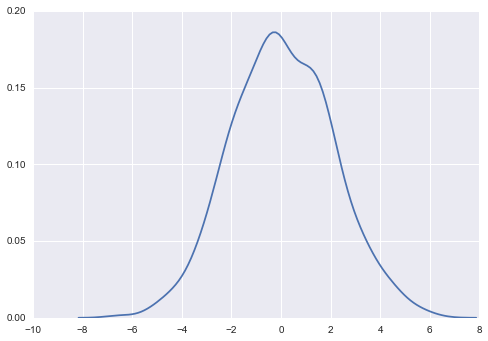

In [45]:
sns.kdeplot(x)   ## también ver la función sns.distplot();

### Box plot o Wisker-plot (graficas de cajas o de bigotes)

Es una forma de graficar distribuciones basada en cuartiles. Es múy util cuando se quieren comparar varios grupos de datos. La caja está delimitada por el primer y tercer cuartil, mientrás que la linea dentro de la caja es el segundo cuartil (la mediana). Los _bigotes_ pueden indicar varias medidas (por eso es simpre importante leer la leyenda o texto que acompaña a un boxplot), a veces se usa una desviación estandard, otras veces los percentiles 2 y 98, otras veces (como en el ejemplo visto) es una función del rango intercuartil (ver más adelante). Los valores por fuera de los bigotes suelen considerarse como datos aberrantes (ver más adelante).

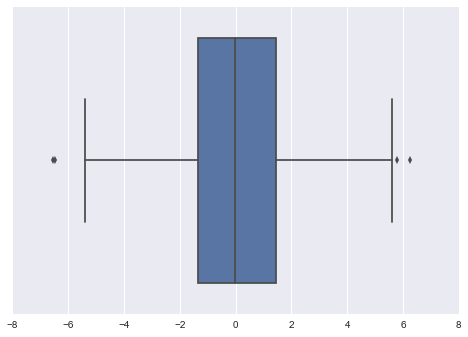

In [47]:
sns.boxplot(x);

### Violin plot

Los violin plot son una combinación de box plot con kde plot.

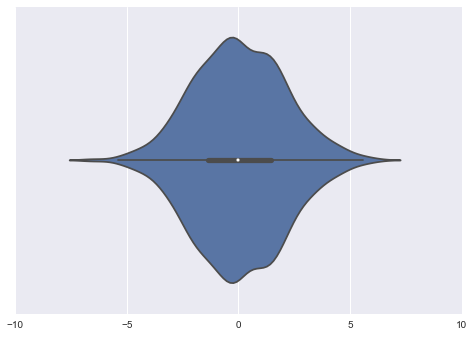

In [51]:
sns.violinplot(x);

### Datos aberrantes

Los datos aberrantes (_outliers_) son valores que están muy alejados de la mayoría de los valores de una distribución. Los valores aberrantes pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contiene datos aberrantes y en muchos casos puede ser conveniente removerlos. Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cual fue el criterio usado para removerlos.  

Existen varios criterios para identificar datos aberrantes. Dos muy usados son:
   * todo valor por debajo de $\mu-n\sigma$ y por encima de $\mu+n\sigma$. Donde n = 1, 2, 3, 6 etc...
   * Se define el rango intercuartil como $IQR = q2 − q3 = p25-p75$ y se define como _outlier_ todo valor por debajo de $q2-1.5*IQR$ y por encima de $q3+1.5*IQR$

El primer criterio suele ser usado para distribuciones que se asemejan a Gaussianas mientras que el segundo es más general ya que el rango intercuartil es una medida más robusta de la dispersión de una distribución que la desviación standard.

Según la desigualdad de Chebyshev, al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución estan dentro $k$ desviaciones estandard. Es decir casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandard, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media. Por ejemplo esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la regla 68-95-99,7, es decir el 68 por cierto de los datos se encuentra dentro de 1 desviación estandard, el 95 dentro de 2 y el 99.7 dentro de 3.

## Correlación

Dos variables son independientes entre si, si se cumple que:

$$p(x|y) = p(x)$$

Es decir si la probabilidad de $x$ dado $y$ es igual a la probabilidad de $x$. En otras palabras, tener información de $y$ no me brinda información sobre $x$. Si dos variables son independientes entonces:

$p(x,y) = p(x) p(y)$

La probabilidad de que ocurra $x$ e $y$ de forma simultanea es igual al producto de sus probabilidades.

La correlación es una medida de la dependencia de dos variables.  Existen varios coeficientes de correlación el más comunmente usado es el coeficiente de correlación de Pearson. Este coeficiente solo sirve para medir relaciones lineales entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables por el producto de sus desviaciones estandard:

$$\rho_{(X,Y)}={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$$

Entonces el coeficiente de correlación de Pearson indica como varia una variable al variar la otra respecto de la variación intrínseca de cada variable.

Identificar correlaciones puede ser útil para entender como dos variables se relacionan y para predecir una a partir de la otra. Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es necesariamente cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones espurias. Por ejemplo en la siguiente figura se puede ver que el número piratas y la media de la temperatura global están inversamente correlacionados.

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/d/de/PiratesVsTemp%28en%29.svg/1024px-PiratesVsTemp%28en%29.svg.png' alt="Pirates_temp", height=25> 

Es cierto que se podría establecer que los cambios introducidos por la revolución industrial terminaron por un lado aumenta la cantidad de $CO_2$ (y otros gases de invernadero) y por el otro produciendo cambios socio-culturales y tecnológicos que llevaron (luego de una larga cadena de sucesos) a la disminución de los piratas. Pero no es cierto que podamos contrarrestar el calentamiento global simplemente aumenta la cantidad de piratas!

Para poder establecer una relacion causal a partir de una correlación hace falta poder establecer y probar la existencia de un mecanismo que vincule ambas variables. Espero que este ejemplo haya servido para ayudarles a entender que correlación no implica causalidad. 

<img src='http://imgs.xkcd.com/comics/correlation.png' alt="xkcd"> 


Una fuente muy divertida de correlaciones espurias es la páginas (en inglés) [Spurios correlation](http://www.tylervigen.com/).

## Estadística Inferencial
 
La estadística inferencial es un forma de modelado. Cuando uno piensa en un modelo, piensa intuitivamente en una simplificación de un fenómeno más complejo. Cuando decimos que un conjunto de datos tomados de un experimento, observación o simulación son explicados por un modelo estadístico estamos simplificando el problema. Decenas, cientos o miles de datos pueden pasar a ser descriptos por un modelo y unos pocos parámetros (en cierto modo estamos comprimiendo información). Por ejemplo podemos decir que la relación entre cantidad de lluvia ($x$) y crecimiento de una planta ($y$) podría (quizá) ser descripto por la ecuación de una recta:

$$y = \alpha + \beta * x  + \epsilon$$

En este caso nuestro modelo sería una linea recta y tendría tres parámetros $\alpha$, $\beta$ y $\epsilon$. Algunas de las ventajas de modelar son:

* Los modelos, al ser más simple que el fenómeno estudiado, permiten pensar el problema con mayor claridad.
* Crear un modelo implica pensar acerca del problema y evaluar cuales son los factores que se consideran más relevantes y cuales pueden ser despreciados. 
* Los modelos estadísticos (como otros modelos formales) pueden ser estudiados analíticamente y/o numéricamente lo que puede contribuir enormemente a comprender el fenómeno subyacente a los datos.

### Los tres objetivos de la inferencia estadística

Siguiendo el ejemplo de la linea recta a continuación vamos a describir brevemente los tres objetivos de la inferencia estadística. Luego, a medida que avancemos en el curso, veremos cada uno de ellos en detalle.

* **Estimación de parámetros**: En este caso lo que nos interesa es estimar los valores más probables de los parámetros ($\alpha$, $\beta$ y $\epsilon$) y el grado de incerteza o error con que estamos estimando dichos parámetros. 


* **Predicción de valores**: En otros casos lo que nos interesa no tiene tanto que ver con los valores que pueden tomar los parámetros si no que estamos focalizados en obtener un modelo que nos permita, a partir de un nuevo conjunto de datos $x_{n}$, predecir el comportamiento del sistema.


* **Comparación/Elección de modelos**: Por último en este caso el énfasis está puesto en comparar distintos modelos entre si a fin de determinar cual es mejor explicando los datos observados. Después de todo podría ser que la cantidad de agua y el crecimiento de una planta tuvieran una relación que no fuese necesariamente lineal.

## Probabilidad

> *Misunderstanding of probability may be the greatest of all impediments to scientific literacy.*
> — Stephen Jay Gould

Because of its reliance on probabilty models, its worth talking a little bit about probability. There are  different ways to define probability, depending on how it is being used. In fact, Bayesian statistics invokes an additional definition of probability that is not used elsewhere.

### 1. Classical probability

<div style="font-size:25px">
\\[Pr(X=x) = \frac{\text{# x outcomes}}{\text{# possible outcomes}}\\]
</div>

Classical probability is an assessment of **possible** outcomes of elementary events. Elementary events are assumed to be equally likely.

### 2. Frequentist probability

<div style="font-size:25px">
\\[Pr(X=x) = \lim_{n \rightarrow \infty} \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}\\]
</div>

Unlike classical probability, frequentist probability is an EMPIRICAL definition. It is an objective statement desribing events that have occurred.

### 3. Subjective probability

<div style="font-size:25px">
\\[Pr(X=x)\\]
</div>

Subjective probability is a measure of one's uncertainty in the value of \\(X\\). It characterizes the state of knowledge regarding some unknown quantity using probability.

It is not associated with long-term frequencies nor with equal-probability events.

For example:

- X = the true prevalence of diabetes in Austin is < 15%
- X = the blood type of the person sitting next to you is type A
- X = the Nashville Predators will win next year's Stanley Cup
- X = it is raining in Nashville

### Distribuciones de probabilidad

En estadística suele ser útil pensar que existe una distribución $h(x)$ a partir de la cual "se generan" los valores observados de $x$. La idea central de la estadística Bayesiana es invertir el proceso y estimar la distribución $h(x)$ a partir de los valores observados de $x$. La necesidad de realizar una _inferencia_ se debe a que en general $h(x)$, es una función que no puede ser observada directamente. Por lo tanto lo mejor que podemos hacer es construir un modelo $g(x)$ que sea capaz de explicar a $x$. La sospecha y esperanza (al menos de los _[realistas](http://es.wikipedia.org/wiki/Realismo_cient%C3%ADfico)_) es que mientras mejor explique $g(x)$ a $x$ mas parecida será $g(x)$. Nuestro modelo, $g(x)$, podría se por ejemplo una distribución Gaussiana, el modelo no está completo si no encontramos además los parámetros de esa distribución (que en este caso son dos, la media y desviación standard).

Cuando $x$ puede tomar valores continuos, la función $g(x)$, es llamada función de densidad de probabilidad ($pdf$ por su sigla en inglés) y cuando $x$ solo puede tomar valores discretos, $g(x)$ es llamada función de masa de probabilidad ($pmf$ por su sigla en inglés). La $pdf$ cuantifica la probabilidad de que un valor se encuentre entre $x$ y $x + dx$ (expresado como $g(x)dx$). A $x$ se la llama variable aleatoria, notese que _aleatoria_ no quiere decir que $x$ pueda tomar cualquier valor, de hecho solo puede tomar los valores definidos por $g(x)$.

A modo de ejemplo veamos como luce la $pdf$ de una distribución Gaussiana:

$$
g(x) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

Como puede verse, una distribución Gaussiana queda definida por dos parámetros:

$x$, la media de la distribución  
$\sigma$, la desviación standard  

Donde $x \in \mathbf{R}$ y $\sigma > 0$. 
Todas las posibles curvas que resulten de la combinación de esos dos parámetros serán curvas de la familia de las Gaussianas.

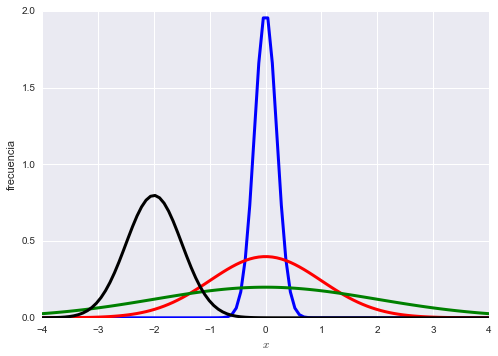

In [3]:
x_values = np.linspace(-4, 4, 100)
gauss0 = stats.norm(0, .2).pdf(x_values)
gauss1 = stats.norm(0, 1).pdf(x_values)
gauss2 = stats.norm(0, 2).pdf(x_values)
gauss3 = stats.norm(-2, .5).pdf(x_values)

plt.plot(x_values, gauss0, lw=3, color='blue',)
plt.plot(x_values, gauss1, lw=3, color='red')
plt.plot(x_values, gauss2, lw=3, color='green')
plt.plot(x_values, gauss3, lw=3, color='black')
plt.xlabel('$x$')
plt.ylabel('frecuencia');

La integral de la $pdf$ es llamada función de distribución acumulada ($cdf$):

\begin{equation}
cdf(x) = \int_{-\infty}^{x} h(x) d(x)
\end{equation}

En algunas situaciones se prefiere hablar de la función de supervivencia:

\begin{equation}
S(x) = 1 - cdf 
\end{equation}

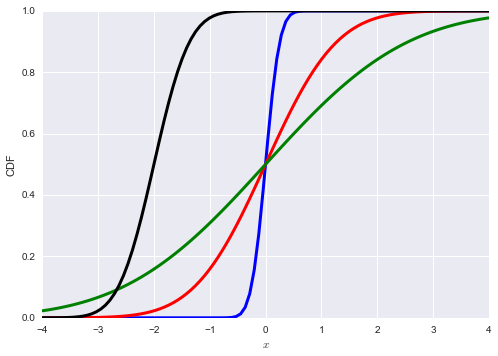

In [4]:
gauss0 = stats.norm(0, .2).cdf(x_values)
gauss1 = stats.norm(0, 1).cdf(x_values)
gauss2 = stats.norm(0, 2).cdf(x_values)
gauss3 = stats.norm(-2, .5).cdf(x_values)

plt.plot(x_values, gauss0, lw=3, color='blue',)
plt.plot(x_values, gauss1, lw=3, color='red')
plt.plot(x_values, gauss2, lw=3, color='green')
plt.plot(x_values, gauss3, lw=3, color='black')
plt.xlabel('$x$')
plt.ylabel('CDF');

### Incerteza

Algo a tener en cuenta es que **siempre** $x$ tiene asociado un error o incerteza $e(x)$ (salvo que los datos sean sintéticos, o usted esté hablando con un _matemático puro_). Este error puede ser definido como la probabilidad de medir un valor $x$ dado que el valor _real_ es $\mu$:

$$
er(x) = p(x|\mu, I)
$$

Donde $I$ es algún parámetro (o conjunto de parámetros) de alguna distribución de probabilidad.

En muchos casos se asume que la distribución de errores es Gaussiana. Este supuesto a veces está justificado por nuestro _conocimiento específico de dominio_ y en otros casos por conveniencia matemática (las Gaussianas tienen varias propiedades que las hacen amenas para el análisis matemático).

$$
er(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

En este caso $I$ es simplemente $\sigma$. La función de distribución del error puede además contener un error sistemático $b$ en cuyo caso $x-\mu$ en la expresión de arriba se convierte en $(x − b − \mu)$.

Cuando la distribución de los errores es la misma para todos los puntos se dice que hay _homocedasticidad_, caso contrario occurre _heterocedasticidad_. Muchos de los métodos de la estadística clásica más comunes son válidos solo cuando la distribución de errores es homocedástica, existiendo métodos especiales para lidiar con la _heterocedasticidad_.

Es importante notar que en la práctica $f(x)$ describe tanto la variabilidad intrínseca de una (o múltiples) variable(s) en una población como también el error asociado a la medición.

### Variables aleatorias

Una variable aleatoria es una variable que proviene de alguna distribución de probabilidad dada, en la práctica es el resultado de una observación, experimento o simulación. En la literatura estadística se suelen escribir usando letras mayúsculas como $X$, mientras que los valores particulares (instancias) de esa variable se escriben usando la misma letra pero en minúscula por ej $x$. Esta notación tiene mucho sentido si se piensa a $X$ como un vector.

Existen dos principales tipos de variables aleatorias, las continuas y las discretas.

En muchos análisis estadísticos se asume que las variables aleatorias provienen de una misma distribución y que son independientes entre si. En estos casos se dice que dichas variables son independientes e idénticamente distribuidas (en ingles iid), es decir:

$p(x,y) = p(x) p(y)$ para todos los valores de $x$ e $y$.

Si una variable aleatoria $X$ proviene o está _distribuida_ según una distribución normal con media $\mu$ y desviación standard $\sigma$ se suele escribir como:

$$
X \sim \mathcal{N} (\mu, \sigma)
$$

Un caso común de variable aleatoria que no es iid son las series temporales (y las cadenas de Markov) ya que existe una dependencia temporal de los valores que puede tomar una variable.

### Distribuciones de probabilidad comunes

Los bloques con los cuales se construyen los modelos estadísticos son las distribucciones de probabilidad. A continuación veremos algunas de las más comunes.

#### Distribución uniforme

Aún siendo simple, la distribución uniforme es muy usada en estadística, por ej para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro. La distribución uniforme tiene entropía cero (todos los estados son igualmente probables).

$$
p(x|a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  para\ x<a\ o\ x>b \end{cases}
$$

0.5 0.0833333333333 0.0 -1.2


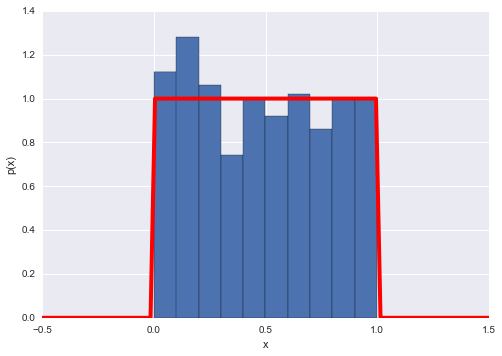

In [5]:
distri = stats.uniform(0, 1)  # distribución uniforme entre a=0 y b=1
x_values = np.linspace(-0.5, 1.5, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución Gaussiana (o normal)

The normal distribution, also called Gaussian, is commonly used because
it describes many phenomena, at least approximately. It turns out that there
is a good reason for its ubiquity, which we will get to in Section 14.4.

Es quizá la distribución más conocida. Por un lado por que muchos fenomenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística frecuentista se basan en asumir una distribución Gaussiana. Por ejemplo el método de los mínimos cuadrados para ajustar modelos lineales no es válido cuando los errores medidos se desvían de una distribución normal.

La distribución Gaussiana se define usando dos parámetros, la media $\mu$ y la desviacion estándar $\sigma$. Una distribucion Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

0.0 1.0 0.0 0.0


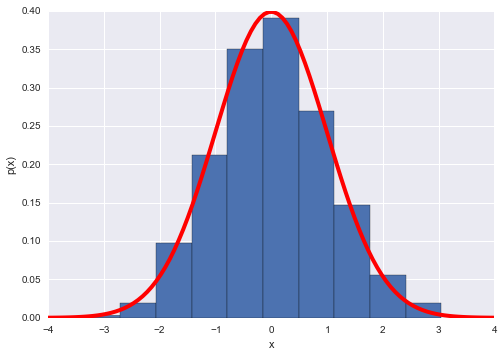

In [7]:
distri = stats.norm(0, 1)  # distribución normal centrada en cero y desviación standard 1
x_values = np.linspace(-4, 4, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución t de Student

Esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) es usada para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. Es una distribución que a medida que aumenta los grados de libertad se parece cada vez más a una distribución gaussiana. Esta distribución tiene colas más gordas que una gaussiana y por ello se la utiliza para hacer regresiones lineales que sean robustas a datos aberrantes.

$$
p(t|\nu) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{-\frac{\nu+1}{2}}
$$

donde $\Gamma$ es la función [gamma](http://es.wikipedia.org/wiki/Funcion_gamma) y where $\nu$ es el número de [grados de libertad](https://es.wikipedia.org/wiki/Grado_de_libertad_%28estad%C3%ADstica%29)

0.0 2.0 0.0 nan


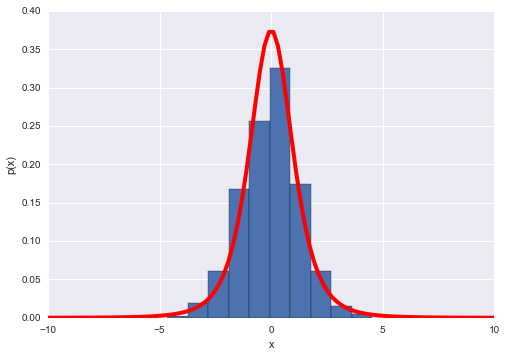

In [9]:
distri = stats.t(4)  # TODO
x_values = np.linspace(-10, 10, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución de Cauchy (o Lorentz)

Una distribución de [Cauchy](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Cauchy) es un caso especial de una t de Student (con un grado de libertad). Esta distribución describe el comportamiento de una variable aleatoria que proviene de la división entre dos variables normales standard independientes. Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no posee una media, varianza, asimetria o curtosis características. Es decir es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de cauchy, la dispersón alrededor de la media será alta y esta dispersión no disminuirá a medida que aumentan el tamaño de la muestra. Una forma de estimar $\mu$ y $\gamma$ es usando la mediana y el rango intercuartil respectivamente. El rango intercuartil de una distribución de Cauchy es igual a $2\gamma$.  


$$
p(x|\mu,\gamma) = {1 \over \pi} \left[ {\gamma \over(x-\mu)^2 + \gamma^2} \right]
$$

inf inf nan nan


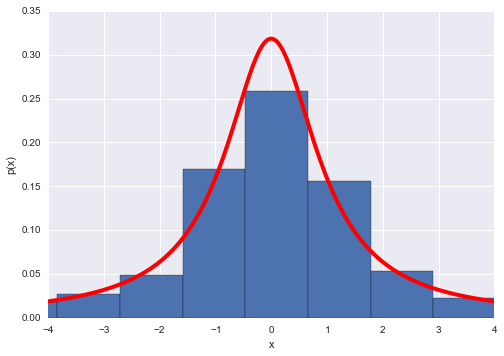

In [15]:
distri = stats.cauchy(0, 1)  # distribución normal centrada en cero y desviación standard 1
x_values = np.linspace(-4, 4, 500)
x = distri.rvs(200)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, bins=500, normed=True)
plt.xlim(-4, 4)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución exponencial

La distribución [exponencial](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson

$$
p(x|\lambda) = \lambda e^{-\lambda x}
$$

3.0 9.0 2.0 6.0


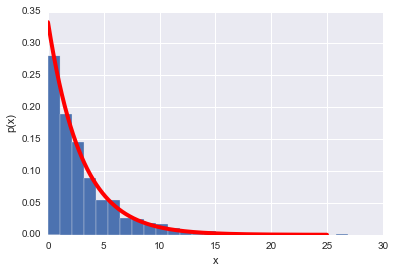

In [39]:
distri = stats.expon(0, 3)  # distribución exponencial ubicada en cero y escala 3
x_values = np.linspace(0, 25, 1000)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, bins=25, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución de Laplace

Esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Laplace) también es llamada doble-exponencial. Por que equivale a dos funciones exponenciales _espalda con espalda_. Es similar a una Gaussiana pero con colas mucho más gordas.

$$
p(x|\mu,b) = \frac{1}{2b} e^{\left( -\frac{|x-\mu|}{b} \right)}
$$

0.0 18.0 0.0 3.0


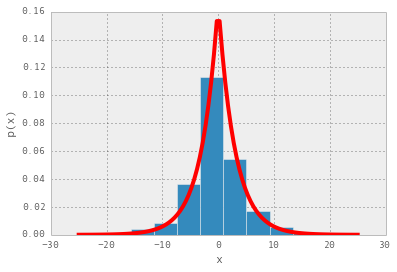

In [74]:
distri = stats.laplace(0, 3)  # distribución laplaciana ubicada en cero y escala 3
x_values = np.linspace(-25, 25, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución $\chi^2$

Dado un conjunto de variables aleatorias que provienen de una distribución Gaussiana standard. El cuadrado de la suma de de $k$ variables sigue una [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) $\chi^2$ con $k$ grados de libertad. Como puede verse esta función depende exclusivamente deltamaño de la muestra $k$.

$$
p(x|k) = \frac{x^{(\frac{k}{2-1})} e^{\frac{-x}{2}}}{2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)}
$$

donde $\Gamma$ es la función [gamma](http://es.wikipedia.org/wiki/Funcion_gamma)

4.0 8.0 1.41421356237 3.0


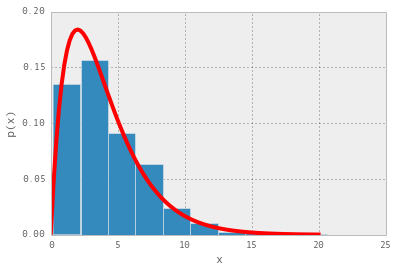

In [73]:
distri = stats.chi2(4)  # K=4, 4 grados de libertad
x_values = np.linspace(0, 20, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución beta
Es una [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es util para modelar proporciones o porcentajes.

$$
p(x|\alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}
$$

donde $\Gamma$ es la función [gamma](http://es.wikipedia.org/wiki/Funcion_gamma)


0.5 0.0227272727273 0.0 -0.461538461538


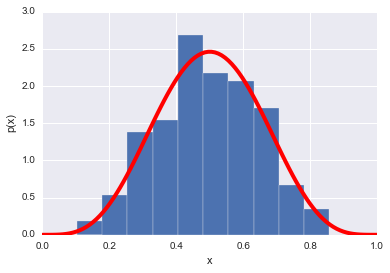

In [37]:
distri = stats.beta(5, 5)  # TODO
x_values = np.linspace(0, 1, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución Gama
La $pdf$ de esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) es:

$$
P(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$$

La distribución gamma se reduce a la exponcial cuando $\alpha=1$ y cuando  $x \sim \Gamma(\nu/2, 2)$, se obtiene una distribución $\chi^2$ con $\nu$ grados de libertad.

1.5 0.75 1.15470053838 2.0


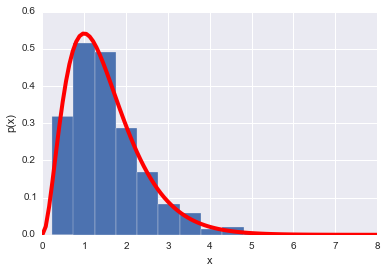

In [60]:
distri = stats.gamma(3, scale=0.5)  # alfa 3, beta 0.5
x_values = np.linspace(0, 8, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución de pareto

[distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto) <font color='red'> </font>. 
Su versión para valores discretos es llamada distribución de [Zipf](http://en.wikipedia.org/wiki/Zipf%27s_law).

Se usa para describir varios fenómemos en las ciencias naturales y sociales, como la distribucion de la riqueza, la cantidad de citas que los artículos reciben en una revista científica, la cantidad de tráfico que reciben las páginas en Internet, el tamaño de los meteoritos, la intensidad de los temblores, la distribución de las notas musicales en la música clásica.

$$p(x|b) = \frac{b} {x^{b+1}}$$

Para $x >= 1$ y $b > 0$

### Distribución Weibul
[distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Weibull)

$$
p(x|\lambda,k) = \begin{cases} \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\ 0 & x\lt0 \end{cases}
$$

3.0 2.0 0.0 12.0


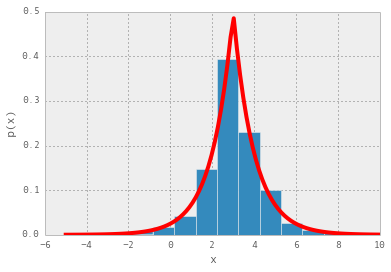

In [70]:
distri = stats.dweibull(1, 3)  # TODO
x_values = np.linspace(-5, 10, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución binomial

Es la [distribución](es.wikipedia.org/wiki/Distribución_binomial) de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre sí, con una probabilidad fija $\theta$ de ocurrencia del éxito entre los ensayos.
Cuando $n=1$ esta distribución se reduce a distribución de Bernoulli.

$$
p(x|n,\theta)={n \choose x}\theta^x(1-\theta)^{n-x}
$$

El término $\theta^x(1-\theta)^{n-x}$ indica la probabilidad de obtener $x$ éxitos en $n$ intentos. Este término solo tiene en cuenta el número total de éxitos obtenidos pero no la secuencia en la que aparecieron. El primer término conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el número de subconjuntos de $x$ elementos escogidos de un conjunto con n elementos. 

\begin{equation}
{n \choose x} = \frac{n!}{x!(n-x)!}
\end{equation}



2.0 1.0 0.0 -0.5


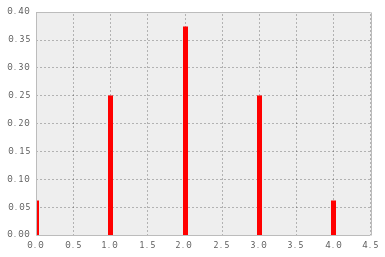

In [128]:
distri = stats.binom(4, 0.5)  # n=número de intentos, probabilidad del evento "1"
x_values = np.arange(0, 5)
x_pdf = distri.pmf(x_values)  # la pdf evaluada para todos los x_values
plt.vlines(x_values, 0, x_pdf, colors='r', lw=5)
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis

### Distribución de Poisson
Es una [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media $\lambda$, la probabilidad de que ocurra un determinado número de eventos $k$ durante un cierto intervalo de tiempo (o espacio, volumen, etc). Concretamente, se especializa en la probabilidad de sucesos con probabilidades muy pequeñas (sucesos _raros_). Se puede pensar como un caso especial de la distribución de Bernoulli cuando $\lim_{n \to \infty} y \lim_{p \to 0} n * p= \lambda$.

$$
p(k|\mu) = \frac{\mu^{k} e^{-\mu}}{k!}
$$

Para valores grandes de $\lambda$ la distribución de Poisson se asemeja (aunque no equivale) a una distribución Gaussiana. 

2.3 2.3 0.659380473396 0.434782608696


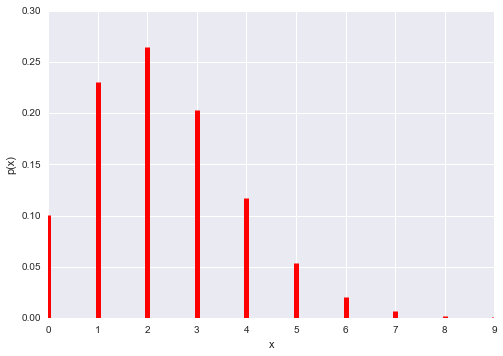

In [16]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x_values = np.arange(0, 10)
x_pdf = distri.pmf(x_values)  # la pdf evaluada para todos los x_values
plt.vlines(x_values, 0, x_pdf, colors='r', lw=5)
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var, skew, kurtosis = distri.stats(moments='mvsk')
print mean, var, skew, kurtosis


## Probability plot

## Por que Normal? 

## El teorema del límite central

El teorema del límite central dice que si tomamos $N$ valores (de forma independiente) de una distribucion arbitraria, la media de esa variables sigue una distribución gaussiana cuando $lim_{N\to\infty}$. Además, la precisión de esa aproximación aumenta con N (el error decrese como $\sim \frac{1}{\sqrt N}$). 

Para distribuciones como la distribución de Cauchy o Paretto, que no posen una varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribucion de Cauchy.

El teorema del límite central explica, al menos en parte, la prevalencia de la distribucion Gaussiana en la naturaleza. Muchos de los fenomenos que estudiamos responden a la combinación de multiples causas combinadas. Por ejmeplo, un fenotipo dado es el resultado de un grán número de factores genéticos y ambientales interactuando entre si.

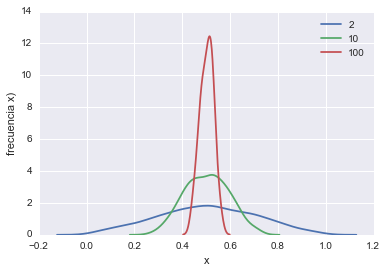

In [65]:
n = 5000
data = np.random.uniform(0, 1, n)
test0 = np.mean(data.reshape((-1, 2)), axis=1)
test1 = np.mean(data.reshape((-1, 10)), axis=1)
test2 = np.mean(data.reshape((-1, 100)), axis=1)


sns.kdeplot(test0, label='2')
sns.kdeplot(test1, label='10')
sns.kdeplot(test2, label='100')

plt.xlabel('x')
plt.ylabel('frecuencia x)');

## La ley de los grandes números (el casino siempre gana).

El promedio de una secuencia de variables aleatorias provenientes de una misma distribución converge al valor esperado (media) de dicha distribución.

Al igual que el teorema del límite central esto no es cierto para distribuciones como la Cauchy.

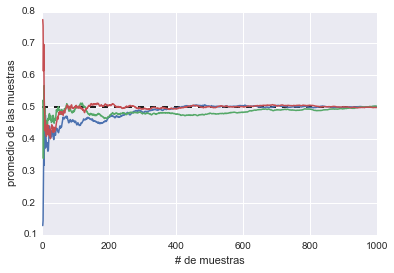

In [75]:
sample_size = 999
N_samples = range(1, sample_size)
expected_value = 0.5

for i in range(3):
    samples = np.random.uniform(0, 1, sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5)

plt.hlines(expected_value, 0, sample_size, linestyle='--', color='k')
plt.ylabel("promedio de las muestras")
plt.xlabel("# de muestras");

## Z-scores

## Error estándard

The standard error (SE) is the standard deviation of the sampling distribution of a statistic.[1] The term may also be used to refer to an estimate of that standard deviation, derived from a particular sample used to compute the estimate.

For example, the sample mean is the usual estimator of a population mean. However, different samples drawn from that same population would in general have different values of the sample mean, so there is a distribution of sampled means (with its own mean and variance). The standard error of the mean (SEM) (i.e., of using the sample mean as a method of estimating the population mean) is the standard deviation of those sample means over all possible samples (of a given size) drawn from the population. Secondly, the standard error of the mean can refer to an estimate of that standard deviation, computed from the sample of data being analyzed at the time.

While the standard deviation is a good measure for the distribution of your values, often you are more interested in the distribution of the mean value. For example, when you measure the response to a new medication, you might be interested in how well you can characterize this response, i.e. is how well you know the mean value. This measure is called the standard error of the mean, or sometimes just the standard error. In a single sample from a population with a standard deviation of σ the variance of the sampling distribution of the mean is σ2/n, and so the standard error of the mean is σ/n√.

For the sample standard error of the mean, which is the one you will be working with most of the time, we have

    The standard error is the standard deviation of the sampling distribution of some statistic

### Para seguir leyendo

* [wikipedia :-)](http://en.wikipedia.org)
* [Think Stats](http://greenteapress.com/thinkstats/)
* [Statistics, data mining and machine learning](http://www.astroml.org/#textbook)
* [Probabilistic Programming & Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/LawOfLargeNumbers.ipynb)

In [19]:
import sys
import IPython
import scipy, matplotlib
print("Este notebook fue creada con: Python %s , IPython %s, scipy %s, Seaborn %s., Matplotlib %s" % (sys.version, IPython.__version__, scipy.__version__, sns.__version__, matplotlib.__version__))

Este notebook fue creada con: Python 2.7.9 (default, Apr  2 2015, 15:33:21) 
[GCC 4.9.2] , IPython 3.1.0, scipy 0.14.1, Seaborn 0.6.0., Matplotlib 1.4.2
